# COMP4220: Machine Learning, Spring 2022, Assignment 3


> ## **Please submit one pdf file for all questions.**


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## variables (based on physicochemical tests):
<ol>
 <li>fixed acidity</li>
 <li>volatile acidity</li>
 <li>citric acid</li>
 <li>residual sugar</li>
 <li>chlorides</li>
 <li>free sulfur dioxide</li>
 <li>total sulfur dioxide</li>
 <li>density</li>
 <li>pH</li>
 <li>sulphates</li>
 <li>alcohol</li>
 <li>quality (score between 0 and 10)</li>
</ol>

## Tips
> An interesting thing to do is to set an arbitrary cutoff for your dependent variable (wine quality): 7 or higher getting classified as '1' and the remainder as '0'.
>### This allows you to convert this problem into a classification problem. 

## 1. Since we want to classify the wine base on the quality so we want to look at the distribution of the wine quality
## Make a histogram plot for the quality column to see the distribution of the wine quality

(array([ 10.,  53., 681., 638., 199.,  18.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <a list of 6 Patch objects>)

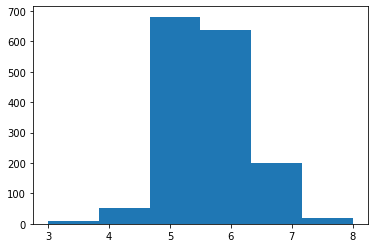

In [ ]:
dist1 = df.quality
fig, axs = plt.subplots()
axs.hist(dist1,bins=6)

## 2. Show the number of null values using sum() method. If there are null values then remove them from the dataset

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Since we want to categorize the dependent variable (wine quality)
## Change the quality column to 1 if the quality >= 7, and 0 if the quality is < 7
## Show the dataset after making this change
## Hint: the quality column should only have 0s and 1s after the change

In [ ]:
df.quality = df.quality.apply(lambda x: 1 if(x>=7) else 0)

(array([1382.,    0.,    0.,    0.,    0.,  217.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <a list of 6 Patch objects>)

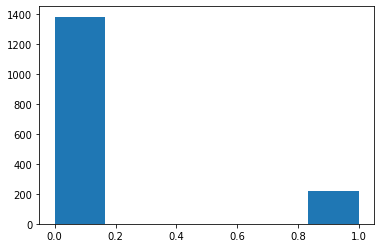

In [ ]:
dist1 = df.quality
fig, axs = plt.subplots()
axs.hist(dist1,bins=6)

In [ ]:
df.quality.sum()

217

## 4. Create y as the quality column and X as everything but the quality column

In [ ]:
y=df.iloc[:,[11]].astype(np.int)
X= df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y.sum()

quality    217
dtype: int64

## 5. Split the dataset into the training and test set using "train_test_split".
## Split the training and test set into 70-30 ratio

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1791)

In [ ]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

## 6. Apply Feature Scaling method for X_train and X_test with "StandardScaler" from "sklearn.preprocessing"
## Hint: use StandardScaler.fit_transform for "X_train" and use StandardScaler.transform for "X_test"

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()

In [ ]:
sc_X.fit_transform(X_train)

array([[ 0.85414959, -0.17477552,  0.37102287, ..., -0.45773358,
        -0.32694028, -0.66208909],
       [-0.23301962,  0.37957201, -1.08755788, ..., -0.07606154,
        -1.13518493, -0.94373809],
       [-0.17580018, -1.11716633,  1.36077409, ...,  0.3692225 ,
         0.82769494, -0.75597209],
       ...,
       [-0.86243336,  0.60131103, -1.24383439, ...,  0.3056105 ,
        -0.4424038 , -0.00490809],
       [-0.46189734, -0.83999256,  1.56914277, ...,  0.3056105 ,
        -0.61559908,  0.93392191],
       [ 2.05575765, -0.5628188 ,  2.0379723 , ..., -1.03024164,
         1.11635374, -0.00490809]])

In [ ]:
sc_X.transform(X_test)

array([[ 0.3391747 , -2.28129615,  0.94403674, ...,  0.62367053,
         0.5967679 ,  1.40333691],
       [ 1.19746618, -1.3943401 ,  1.41286626, ..., -0.39412157,
        -0.15374499, -0.84985509],
       [ 2.79961026, -0.39651454,  1.30868192, ..., -1.34830167,
        -0.55786732, -1.3192701 ],
       ...,
       [-0.63355564, -0.6736883 ,  0.16265419, ...,  0.81450655,
        -0.78879436, -0.94373809],
       [-0.34745848,  0.2687025 , -1.34801873, ...,  0.05116247,
        -0.55786732,  0.08897491],
       [ 2.45629367, -0.78455781,  1.15240541, ..., -1.53913769,
         0.94315846, -0.09879109]])

## 7. Train the logistic regression model on the training set using (solver='lbfgs', random_state = 42, max_iter = 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs',random_state=42,max_iter=1000)

In [ ]:
log_reg.fit(X_train,y_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

## 8.Predict the results of x_test

In [ ]:
y_test_pred = log_reg.predict(X_test)

In [ ]:
y_test_pred

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

## 9.Make the confusion matrix and show the result


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
arr =confusion_matrix(y_test_1, y_test_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

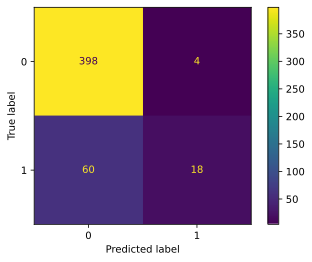

In [ ]:
ConfusionMatrixDisplay(arr).plot()

## 10. find the precision_score, recall_score, and f1_score and print them

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test_1,y_test_pred)

0.8181818181818182

In [ ]:
recall_score(y_test_1, y_test_pred)

0.23076923076923078

In [ ]:
f1_score(y_test_1,y_test_pred)

0.36000000000000004

## 11. Use the precision_recall_curve() function to compute precision and recall for all possible thresholds
 

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
y_scores = cross_val_predict(log_reg, X_test, y_test_1.values.ravel(), cv = 3, method = "decision_function")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

## 12. Use Matplotlib to plot precision and recall as functions of the threshold value

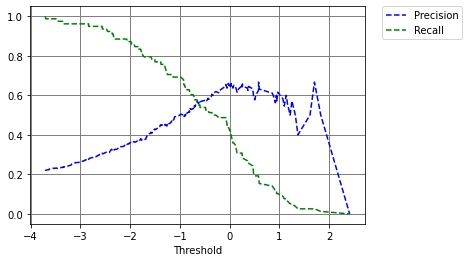

In [ ]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

## 13. Plot the precision vs recall plot


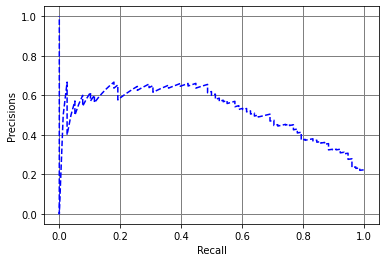

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--")
    plt.ylabel("Precisions")
    plt.xlabel("Recall")
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_vs_recall(precisions, recalls)
plt.show()

## 14. Plot the ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds_roc = roc_curve(y_test,y_scores)

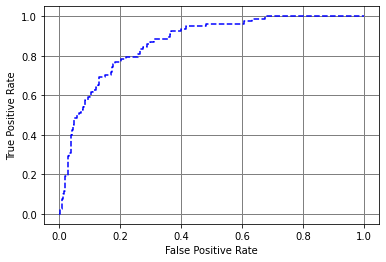

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, "b--")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_roc_curve(fpr, tpr)
plt.show()

## 15. Find the area under the ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_scores)

0.8676170429901773

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('HW3_posted.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/HW3_posted.ipynb to pdf
[NbConvertApp] Support files will be in HW3_posted_files/
[NbConvertApp] Making directory ./HW3_posted_files
[NbConvertApp] Making directory ./HW3_posted_files
[NbConvertApp] Making directory ./HW3_posted_files
[NbConvertApp] Making directory ./HW3_posted_files
[NbConvertApp] Making directory ./HW3_posted_files
[NbConvertApp] Writing 86357 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', './notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex

'File Download Unsuccessful. Saved in Google Drive'